<a href="https://colab.research.google.com/github/masrik-dev/Deep-Learning-with-TensorFlow-and-Python/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Introduction to Regression with Neural Networks in TensorFlow**

 There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


## **Creating data to view and fit**

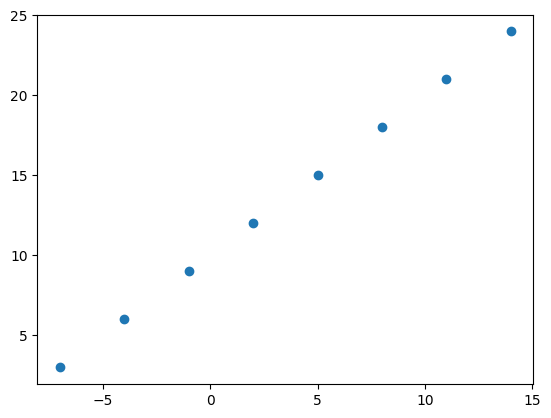

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, Y);

In [3]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## **Input and output shapes**

In [4]:
# Create a demo tensor for our housing prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], Y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [8]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
X[0], Y[0]

(np.float64(-7.0), np.float64(3.0))

In [11]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y), dtype=tf.float32)
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
X.ndim, Y.ndim

(1, 1)

In [13]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

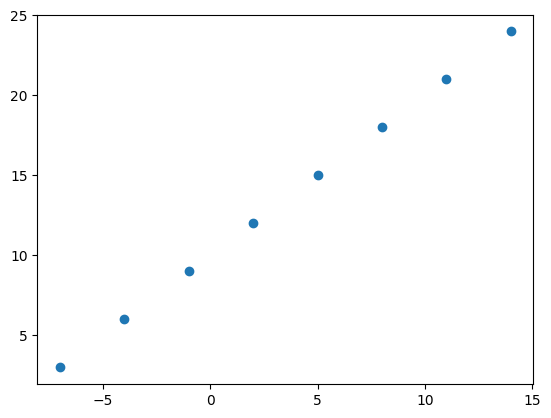

In [14]:
plt.scatter(X, Y)

## **Steps in modelling with TensorFlow**

1. **Creating a model** - define the input an doutput layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & Y (feqtures and labels).


In [15]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
# model.fit(X, Y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 20.8586 - mae: 20.8586
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 20.4894 - mae: 20.4894
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 20.2081 - mae: 20.2081
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 19.9269 - mae: 19.9269
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 19.6456 - mae: 19.6456


In [16]:
# Check out X and Y
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Try and make a prediction using this model
P = model.predict(np.array([17.0])) # make input as NumPy array
T = model.predict(tf.constant([17.0])) # make input as Tensor
P, T

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


(array([[-21.467926]], dtype=float32), array([[-21.467926]], dtype=float32))

In [18]:
model.predict(tf.constant([20.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[-25.262562]], dtype=float32)

### **Improving our model**

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [19]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step - loss: 10.5797 - mae: 10.5797
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 10.4472 - mae: 10.4472
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 10.3147 - mae: 10.3147
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 10.1822 - mae: 10.1822
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 10.0497 - mae: 10.0497
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.9172 - mae: 9.9172
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 9.7847 - mae: 9.7847
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 9.6522 - mae: 9.6522
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 9.5197 - mae: 9.5197
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 9.3872 - mae: 9.3872
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 9.2547 - mae: 9.2547
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 9.1222 - mae: 9.1222
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [20]:
# Remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [21]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[29.871964]], dtype=float32)

### **Let's update our model again**

In [22]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 650ms/step - loss: 12.7271 - mae: 12.7271
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 12.1440 - mae: 12.1440
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 11.5498 - mae: 11.5498
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 10.9441 - mae: 10.9441
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.3214 - mae: 10.3214
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 9.6847 - mae: 9.6847
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 9.0273 - mae: 9.0273
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 8.3421 - mae: 8.3421
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 7.6111 - mae: 7.6111
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6.8254 - mae: 6.8254
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 5.9884 - mae: 5.9884
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 5.0924 - mae: 5.0924
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [23]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [24]:
# Let's see if our model's prediction has improved
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


array([[31.468039]], dtype=float32)

### **Let's improve our model again**

* Next, increase the number of hidden units (we already tried **tf.keras.layers.Dense(100, activation="relu")**), so we skip this part.
* Now, we will change the **activation function**

In [25]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 840ms/step - loss: 13.5422 - mae: 13.5422
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 13.0282 - mae: 13.0282
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 12.5130 - mae: 12.5130
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 11.9941 - mae: 11.9941
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 11.4687 - mae: 11.4687
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 10.9341 - mae: 10.9341
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 10.3875 - mae: 10.3875
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 9.8262 - mae: 9.8262
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 9.2473 - mae: 9.2473
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 8.6478 - mae: 8.6478
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 8.0246 - mae: 8.0246
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 7.3746 - mae: 7.3746
Epoch 13/100
1/1 ━━━━━━━━

In [26]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [27]:
# Let test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[29.735147]], dtype=float32)

### **Again, Let improve our model**
* Change the optimization function from **SGD** to **Adam**

In [28]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14.0801 - mae: 14.0801
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 13.9886 - mae: 13.9886
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 13.8973 - mae: 13.8973
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 13.8061 - mae: 13.8061
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 13.7150 - mae: 13.7150
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 13.6240 - mae: 13.6240
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 13.5332 - mae: 13.5332
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 13.4424 - mae: 13.4424
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 13.3517 - mae: 13.3517
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 13.2611 - mae: 13.2611
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 13.1706 - mae: 13.1706
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 13.0802 - mae: 13.0802
Epoch 13/100
1/1 ━━━

In [29]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [30]:
# Test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


array([[30.726023]], dtype=float32)

### **Let's improve our model again**
* Change the **learning rate = lr** of the optimization function **Adam()**

In [31]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # default lr= 0.001
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=100)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 14.1239 - mae: 14.1239
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 13.1329 - mae: 13.1329
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 12.1339 - mae: 12.1339
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 11.1218 - mae: 11.1218
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 10.0912 - mae: 10.0912
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 9.0367 - mae: 9.0367
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 7.9522 - mae: 7.9522
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - loss: 6.8318 - mae: 6.8318
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 6.8222 - mae: 6.8222
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 7.3097 - mae: 7.3097
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 7.7028 - mae: 7.7028
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 7.7295 - mae: 7.7295
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [32]:
# Let's remember our data again
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [33]:
# Let's test our model
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[27.070066]], dtype=float32)

### **Almost correct prediction but not super good**

> when it comes to evaluation... **Visualize it**

It's a good idea to visualize:
* **The Data -** what data are we working with? What does it look like?
* **The model itself -** what does our model look like?
* **The training of a model -** how does a model perform while it learns?
* **The predictions of the model -** how do the predictions of a model line up against the ground truth (the original labels)?

In [34]:
# Make a biddger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [35]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

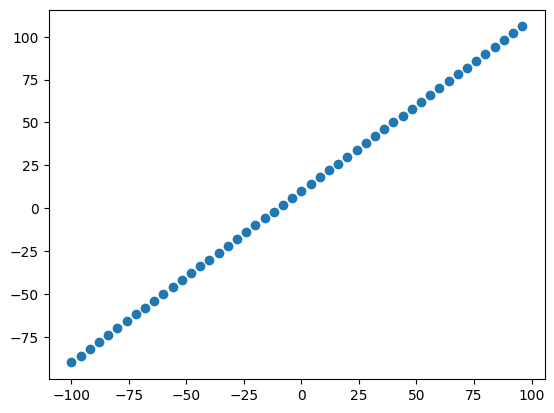

In [36]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### **The 3 sets**
* **Training set -** the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set -** the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set -** the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

In [37]:
# Check the length of how many samples we have
len(X)

50

In [38]:
# Split the data into train and test sets
X_train = X[0:40]   # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]   # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

### **Visualizing the data**
* **Now, we'he got our data in training and test sets. Let's visualize it again!**

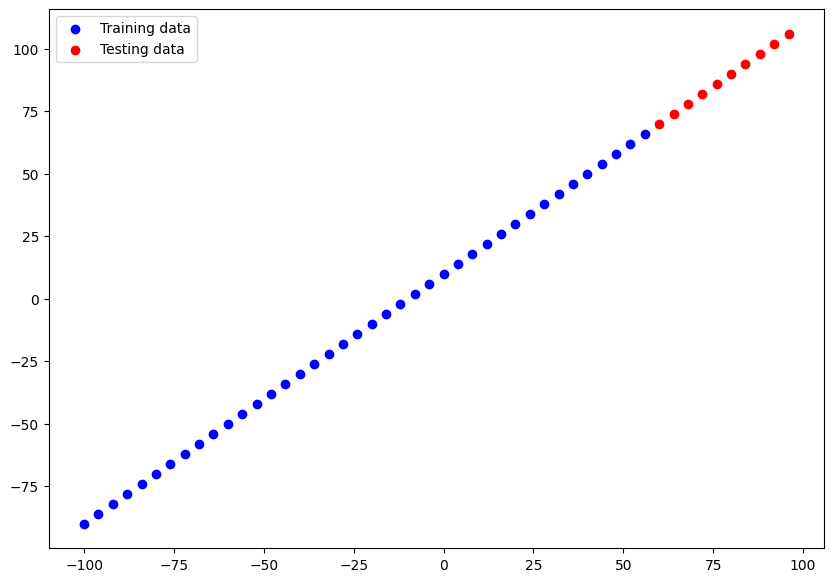

In [39]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in red
plt.scatter(X_test, y_test, c="r", label="Testing data")

# Show a legend
plt.legend();

In [40]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 88.0568 - mae: 88.0568 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 52.8886 - mae: 52.8886
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 19.0895 - mae: 19.0895
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 12.4553 - mae: 12.4553
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 8.4126 - mae: 8.4126
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.1520 - mae: 9.1520
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.2271 - mae: 8.2271
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.8911 - mae: 8.8911
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.8181 - mae: 7.8181
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.8180 - mae: 10.8180
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.6164 - mae: 7.6164
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.9941 - mae: 11.9941
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━

In [41]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these parameters aren't updated during training (this is typical when we bring in already learn patterns or parameters from other models during **transfer learning**).

🎬**Resource:** For a more in-depth overview of the trainable parameters within a layer: **MIT's introduction to deep learning video** https://www.youtube.com/watch?v=alfdI7S6wCY



In [43]:
# We will change the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling "model.summary()"
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])


In [44]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6 (24.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

In [45]:
print(X_train.ndim)

1


In [46]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=1) # Reshape the dimension of y_train to match output

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 56.7113 - mae: 56.7113 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 48.2861 - mae: 48.2861
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 40.5251 - mae: 40.5251
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 32.8332 - mae: 32.8332
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 25.1443 - mae: 25.1443
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17.6909 - mae: 17.6909
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.5263 - mae: 11.5263 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.5103 - mae: 8.5103
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.7506 - mae: 7.7506
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 7.6937 - mae: 7.6937
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.7528 - mae: 7.7528
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.6863 - mae: 7.6863
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━

In [47]:
# Get a summary of our model
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 3)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 6 (24.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

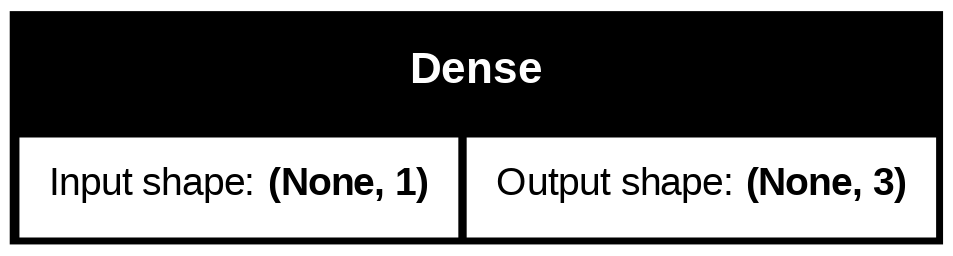

In [48]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [49]:
# Let's test our model
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Let's fit our model to the training data
model.fit(X_train, tf.expand_dims(y_train, axis=-1), epochs=100, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
# Get a summary of our model
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (52.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

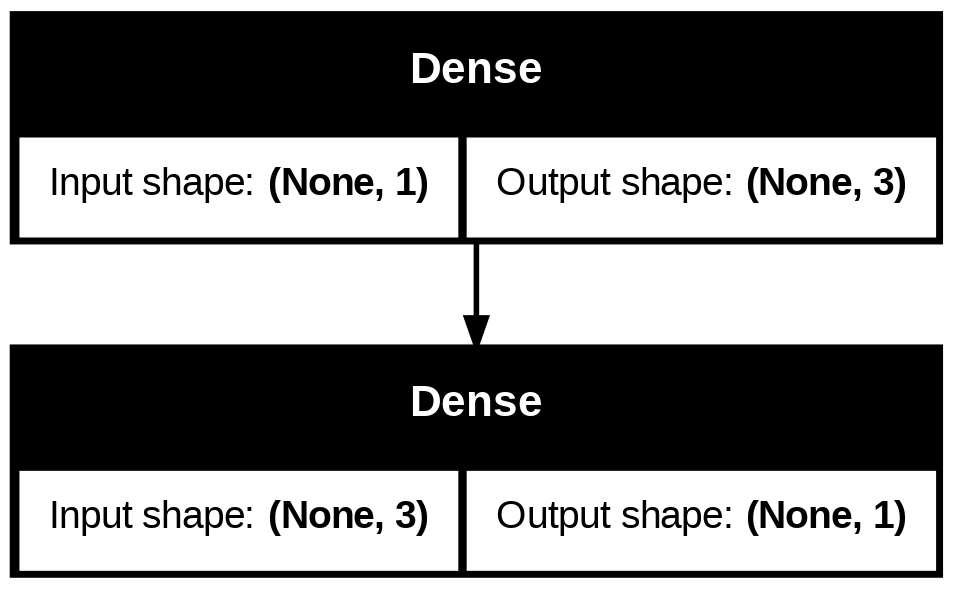

In [51]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### **Visualizing our model's prediction**

* To visualize predictions, it's a good idea to plot them against the ground truth labels.
* Often we'll see this in the form of **y_test** or **y_true** versus **y_pred** (ground truth versus our model's predictions).

In [52]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[33.65974 ],
       [35.775814],
       [37.891884],
       [40.007954],
       [42.124027],
       [44.240097],
       [46.356167],
       [48.47224 ],
       [50.58831 ],
       [52.70438 ]], dtype=float32)

In [53]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**Note:** If we are going to reuse some kind of functionality in the future, it's good idea to turn it into a function.

In [54]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();


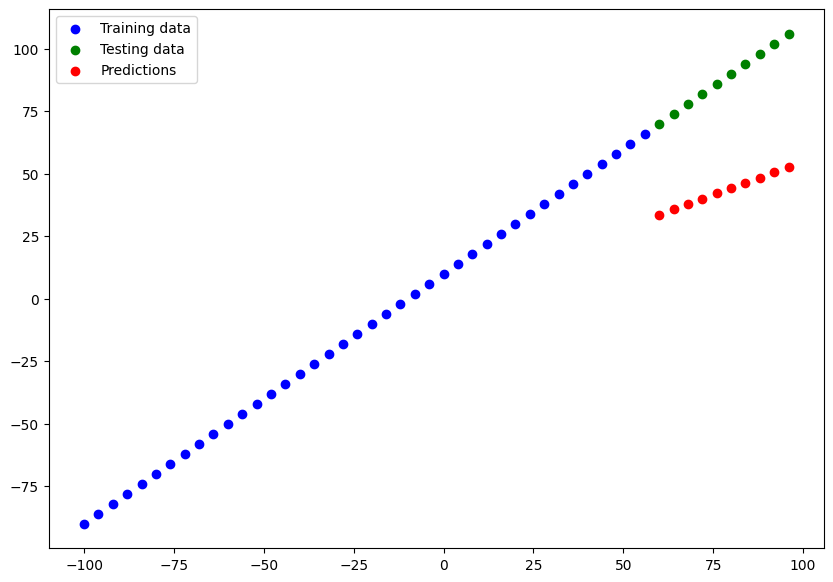

In [55]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## **Evaluting our model's predictions with regression evaluating metrics**

**Depending on the problem we're working on, there will be different evaluation metrics to evaluate your model's performance.**

Since we're working on a regression, two of the main metrics:
* **MAE - mean absolute error, "on average, how wrong is each of the model's predictions"**
* **MSE - mean square error, "on average, how wrong is the square of each of the models predictions"**

In [56]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 44.8179 - mae: 44.8179


[44.81793975830078, 44.81793975830078]

In [57]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()
mae.update_state(y_test, y_pred)
result = mae.result().numpy()
print(result)

44.81794


In [58]:
# Calculate the mean absolute error (in latest version this code will work)
tf.keras.metrics.mae(y_true=y_test,
                     y_pred=y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.34026 , 38.224186, 40.108116, 41.992046, 43.875973, 45.759903,
       47.643833, 49.52776 , 51.41169 , 53.29562 ], dtype=float32)>

**We should have one output value like previous cell.**

In [59]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[33.65974 ],
       [35.775814],
       [37.891884],
       [40.007954],
       [42.124027],
       [44.240097],
       [46.356167],
       [48.47224 ],
       [50.58831 ],
       [52.70438 ]], dtype=float32)>

In [60]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

**y_pred** has extra dimention (10, 1) than **y_test** (10,)

In [61]:
# Let's bring out the extra dimension in y_pred
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.65974 , 35.775814, 37.891884, 40.007954, 42.124027, 44.240097,
       46.356167, 48.47224 , 50.58831 , 52.70438 ], dtype=float32)>

In [62]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=44.81793975830078>

In [63]:
# Calculate the mean square error
mse = tf.keras.metrics.mse(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2037.928466796875>

In [64]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.keras.metrics.mse(y_true=y_test,
                              y_pred=tf.squeeze(y_pred))


### **Running experiments to improve our model**

`Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...`

1. **Get more data-** get more examples for your model to train on (more opportunities to learn patterns or relationships or relationships between features and labels).
2. **Make our model larger (using a more complex model)-** this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer-** give your model more of a chance to find patterns in the data.


In [65]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Let's do 3 modelling experiments:**
1. **`model_1`-** same as the original model, **1** layer, trained for **100** epochs.
2. **`model_2`- 2** layers, trained for **100** epochs.
3. **`model_3`- 2** layers, trained for **500** epochs.

### **Build `model_1`**

In [68]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 43.8303 - mae: 43.8303 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.2761 - mae: 12.2761
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.3315 - mae: 8.3315
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.0309 - mae: 9.0309
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.0317 - mae: 8.0317
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.7233 - mae: 9.7233
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.0139 - mae: 8.0139
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.7117 - mae: 9.7117
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 7.9960 - mae: 7.9960
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 9.7001 - mae: 9.7001
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 7.9782 - mae: 7.9782
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 9.6885 - mae: 9.6885
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26m

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


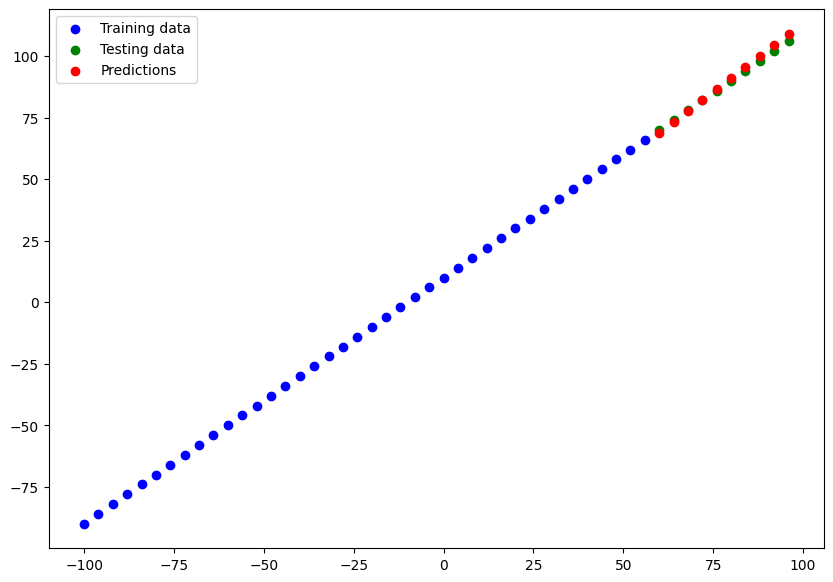

In [70]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [71]:
# Calculate model_1 evaluation matrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.3649200201034546>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.6903014183044434>)

### **Build `model_2`**
* **2** dense layers, trained for **100** epochs

In [72]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 32.7529 - mse: 1498.6849 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 26.5328 - mse: 965.9805
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 23.8236 - mse: 770.0275
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.9801 - mse: 539.3990
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 18.0630 - mse: 441.9988
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 17.2850 - mse: 403.1035
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.9769 - mse: 225.1864
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.8514 - mse: 307.9193
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.6810 - mse: 332.8487
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.7648 - mse: 214.4069
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 14.7362 - mse: 300.9928 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.8508 - mse: 190.1336
Epoch 13/1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


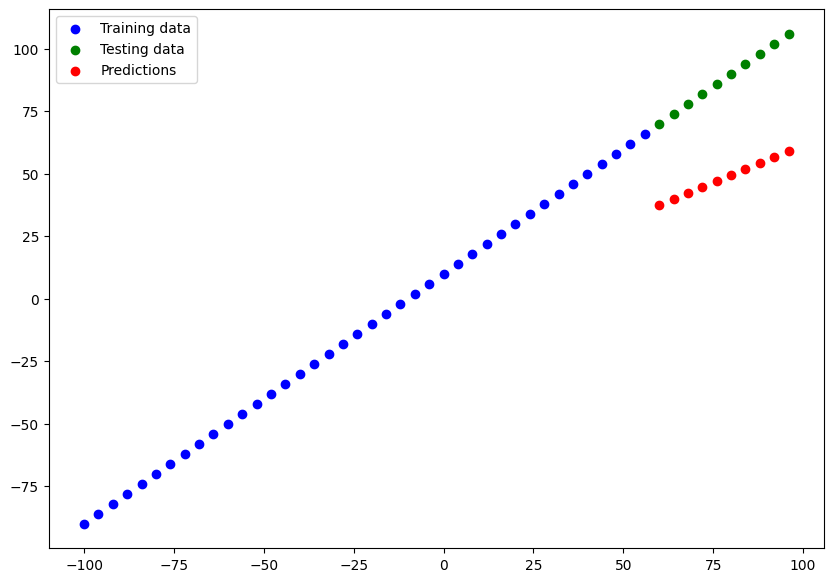

In [73]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [74]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=39.51377487182617>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1582.3294677734375>)

### **Build `model-3`**
* **2** layers, trained for **500** epochs.

In [75]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 44.0551 - mae: 44.0551 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 33.5308 - mae: 33.5308
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 23.7151 - mae: 23.7151
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.6524 - mae: 19.6524
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 17.6192 - mae: 17.6192
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 16.7446 - mae: 16.7446
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 16.5648 - mae: 16.5648
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.7425 - mae: 11.7425
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 14.6621 - mae: 14.6621
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 15.6035 - mae: 15.6035
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.7748 - mae: 11.7748
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.7668 - mae: 14.7668
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


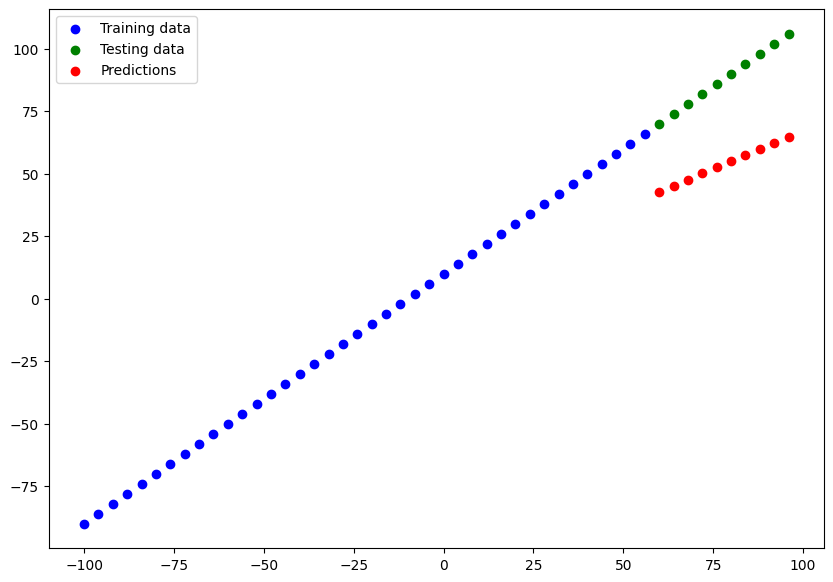

In [76]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [77]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=34.240379333496094>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1192.7318115234375>)

🔑 **Note: We have to start with small experiments (small models) and make sure they work and then increase their scale when necessary.**

## **Comparing the results of mour experiments**
We've run a few experiments, let's compare the results.

In [80]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.364920,2.690301
1,model_2,39.513775,1582.329468
2,model_3,34.240379,1192.731812


**Looks like model_1 performed the best**

In [81]:
model_1.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑 **Note: One of our main goal should be to minimize the time between our experiments. The more experiments we do, the more things we'll figure out which don't work. And in turn, we'll get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".**

## **Tracking our experiments**

One really good habit in machine learning modelling is to track the results of our experiments.

And when we'll doing so, it can be tedious if we're running lots of experiments.

Luckily, there are tools to help us!

⚒ **Resource:** As we build more models, we'll be using:
* **TensorBoard**- a component of the TensorFlow library to help track modelling experiments.
* **Weights & Biases**- a tool for tracking all of kinds of machine learning experiments (plug straight into TensorBoard)